In [1]:
import pandas as pd
from darts import TimeSeries

In [2]:
df = pd.read_csv("MY3_May_2023_KNN_Imputed.csv")

df

,Datetime,id,field1,field2,field3,field4,field5,field6,field7,field8
0,2022-07-03 20:30:00,2.200000e+01,8.871990,0.000000,398.496241,3.636364,26.00000,71.000000,45.666667,55.000000
1,2022-07-03 20:45:00,6.700000e+01,3.802281,0.000000,229.323308,0.000000,25.00000,62.000000,44.666667,53.333333
2,2022-07-03 21:00:00,1.120000e+02,12.674271,0.000000,184.210526,0.000000,25.00000,60.000000,43.666667,52.750000
3,2022-07-03 21:15:00,1.560000e+02,16.476553,0.000000,165.413534,0.000000,24.00000,59.666667,43.333333,52.666667
4,2022-07-03 21:30:00,5.307278e+05,321.540266,190.816359,794.429588,371.997558,27.25921,61.186420,18.749892,20.904609
...,...,...,...,...,...,...,...,...,...,...
28042,2023-04-21 23:00:00,1.061851e+06,397.944200,225.108225,700.960219,489.898990,29.00000,69.000000,27.666667,29.000000
28043,2023-04-21 23:15:00,1.061896e+06,392.070485,225.974026,707.818930,492.424242,29.00000,69.000000,31.666667,36.000000
28044,2023-04-21 23:30:00,1.061941e+06,393.538913,225.974026,716.049383,493.686869,29.00000,70.000000,33.333333,39.333333
28045,2023-04-21 23:45:00,1.061986e+06,392.070485,225.108225,727.023320,488.636364,29.00000,70.000000,35.333333,42.666667


In [3]:
df1 = df
df1['Datetime'] = pd.to_datetime(df['Datetime'])

df1 = df.set_index('Datetime')
#df1
df2=df1.resample('1H').mean()
df2.reset_index(inplace = True)
df2.head()

,Datetime,id,field1,field2,field3,field4,field5,field6,field7,field8
0,2022-07-03 20:00:00,44.500000,6.337136,0.000000,313.909774,1.818182,25.500000,66.500000,45.166667,54.166667
1,2022-07-03 21:00:00,265430.890775,168.057839,95.408180,484.620809,185.998779,25.879605,60.509877,31.124946,36.806471
2,2022-07-03 22:00:00,530727.781549,321.540266,190.816359,794.429588,371.997558,27.259210,61.186420,18.749892,20.904609
3,2022-07-03 23:00:00,530727.781549,321.540266,190.816359,794.429588,371.997558,27.259210,61.186420,18.749892,20.904609
4,2022-07-04 00:00:00,530727.781549,321.540266,190.816359,794.429588,371.997558,27.259210,61.186420,18.749892,20.904609


In [4]:
df2.isnull().sum()

Datetime    0
id          0
field1      0
field2      0
field3      0
field4      0
field5      0
field6      0
field7      0
field8      0
dtype: int64

In [5]:
df2.fillna("30" , inplace=True)
df2

,Datetime,id,field1,field2,field3,field4,field5,field6,field7,field8
0,2022-07-03 20:00:00,4.450000e+01,6.337136,0.000000,313.909774,1.818182,25.500000,66.500000,45.166667,54.166667
1,2022-07-03 21:00:00,2.654309e+05,168.057839,95.408180,484.620809,185.998779,25.879605,60.509877,31.124946,36.806471
2,2022-07-03 22:00:00,5.307278e+05,321.540266,190.816359,794.429588,371.997558,27.259210,61.186420,18.749892,20.904609
3,2022-07-03 23:00:00,5.307278e+05,321.540266,190.816359,794.429588,371.997558,27.259210,61.186420,18.749892,20.904609
4,2022-07-04 00:00:00,5.307278e+05,321.540266,190.816359,794.429588,371.997558,27.259210,61.186420,18.749892,20.904609
...,...,...,...,...,...,...,...,...,...,...
7008,2023-04-21 20:00:00,1.061380e+06,395.374449,224.242424,685.528121,498.737374,30.000000,68.500000,22.833333,23.916667
7009,2023-04-21 21:00:00,1.061558e+06,396.475771,225.757576,692.386831,496.527778,29.750000,69.000000,25.500000,27.250000
7010,2023-04-21 22:00:00,1.061738e+06,393.538913,227.056277,710.562414,493.686869,29.000000,69.000000,31.000000,34.833333
7011,2023-04-21 23:00:00,1.061918e+06,393.906021,225.541126,712.962963,491.161616,29.000000,69.500000,32.000000,36.750000


In [6]:
print(df2.isnull().sum())

Datetime    0
id          0
field1      0
field2      0
field3      0
field4      0
field5      0
field6      0
field7      0
field8      0
dtype: int64


In [7]:
df = df2

target1 = 'field1'
test_l = 168
train_l = len(df) - test_l
date = 'Datetime'
# Create a TimeSeries, specifying the time and value columns
series1 = TimeSeries.from_dataframe(df, date, target1)

# Set aside the last 24 hours as a validation series
train1, val1 = series1[:train_l], series1[train_l:]

target2 = 'field2'
test_l = 168
train_l = len(df) - test_l

# Create a TimeSeries, specifying the time and value columns
series2 = TimeSeries.from_dataframe(df, date, target2)

# Set aside the last 24 hours as a validation series
train2, val2 = series2[:train_l], series2[train_l:]

target3 = 'field3'
test_l = 168
train_l = len(df) - test_l

# Create a TimeSeries, specifying the time and value columns
series3 = TimeSeries.from_dataframe(df, date, target3)

# Set aside the last 24 hours as a validation series
train3, val3 = series3[:train_l], series3[train_l:]

target4 = 'field4'
test_l = 168
train_l = len(df) - test_l

# Create a TimeSeries, specifying the time and value columns
series4 = TimeSeries.from_dataframe(df, date, target4)

# Set aside the last 24 hours as a validation series
train4, val4 = series4[:train_l], series4[train_l:]

target7 = 'field7'
test_l = 168
train_l = len(df) - test_l

# Create a TimeSeries, specifying the time and value columns
series7 = TimeSeries.from_dataframe(df, date, target7)

# Set aside the last 24 hours as a validation series
train7, val7 = series7[:train_l], series7[train_l:]

target8 = 'field8'
test_l = 168
train_l = len(df) - test_l

# Create a TimeSeries, specifying the time and value columns
series8 = TimeSeries.from_dataframe(df, date, target8)

# Set aside the last 24 hours as a validation series
train8, val8 = series8[:train_l], series8[train_l:]

In [8]:
from darts.models import RandomForest
# n = len(val1)


modelrf1 = RandomForest(lags=96, output_chunk_length=96, n_estimators = 200, max_depth = None, multi_models = True)
modelrf1.fit(train1)
predrf1 = modelrf1.predict(len(val1), train1)

modelrf2 = RandomForest(lags=96, output_chunk_length=96, n_estimators = 200, max_depth = None, multi_models = True)
modelrf2.fit(train2)
predrf2 = modelrf2.predict(len(val2), train2)

modelrf3 = RandomForest(lags=96, output_chunk_length=96, n_estimators = 200, max_depth = None, multi_models = True)
modelrf3.fit(train3)
predrf3 = modelrf3.predict(len(val3), train3)

modelrf4 = RandomForest(lags=96, output_chunk_length=96, n_estimators = 200, max_depth = None, multi_models = True)
modelrf4.fit(train4)
predrf4 = modelrf4.predict(len(val4), train4)

modelrf7 = RandomForest(lags=96, output_chunk_length=96, n_estimators = 200, max_depth = None, multi_models = True)
modelrf7.fit(train7)
predrf7 = modelrf7.predict(len(val7), train7)

modelrf8 = RandomForest(lags=96, output_chunk_length=96, n_estimators = 200, max_depth = None, multi_models = True)
modelrf8.fit(train8)
predrf8 = modelrf8.predict(len(val8), train8)

In [9]:
from darts.metrics import rmse, mae, mape

EPSILON = 1e-6  # A small constant to avoid division by zero

# Assuming you have the actual test values for each target in separate variables:
actual_test_values = [val1, val2, val3, val4, val7, val8]
predictions = [predrf1, predrf2, predrf3, predrf4, predrf7, predrf8]

# Create lists to store the evaluation metrics for each target
rmse_list = []
mae_list = []
mape_list = []

for actual, pred in zip(actual_test_values, predictions):
    # Add a small constant to avoid zero values in the actual test values
    actual += EPSILON

    # Calculate evaluation metrics
    rmse_val = rmse(actual, pred)
    mae_val = mae(actual, pred)
    mape_val = mape(actual, pred)

    # Append the metrics to the respective lists
    rmse_list.append(rmse_val)
    mae_list.append(mae_val)
    mape_list.append(mape_val)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Target': ['target1', 'target2', 'target3', 'target4', 'target7', 'target8'],
    'RMSE': rmse_list,
    'MAE': mae_list,
    'MAPE': mape_list
})

# Save the results to a CSV file
results_df.to_csv('RandomForest_1.csv', index=False)


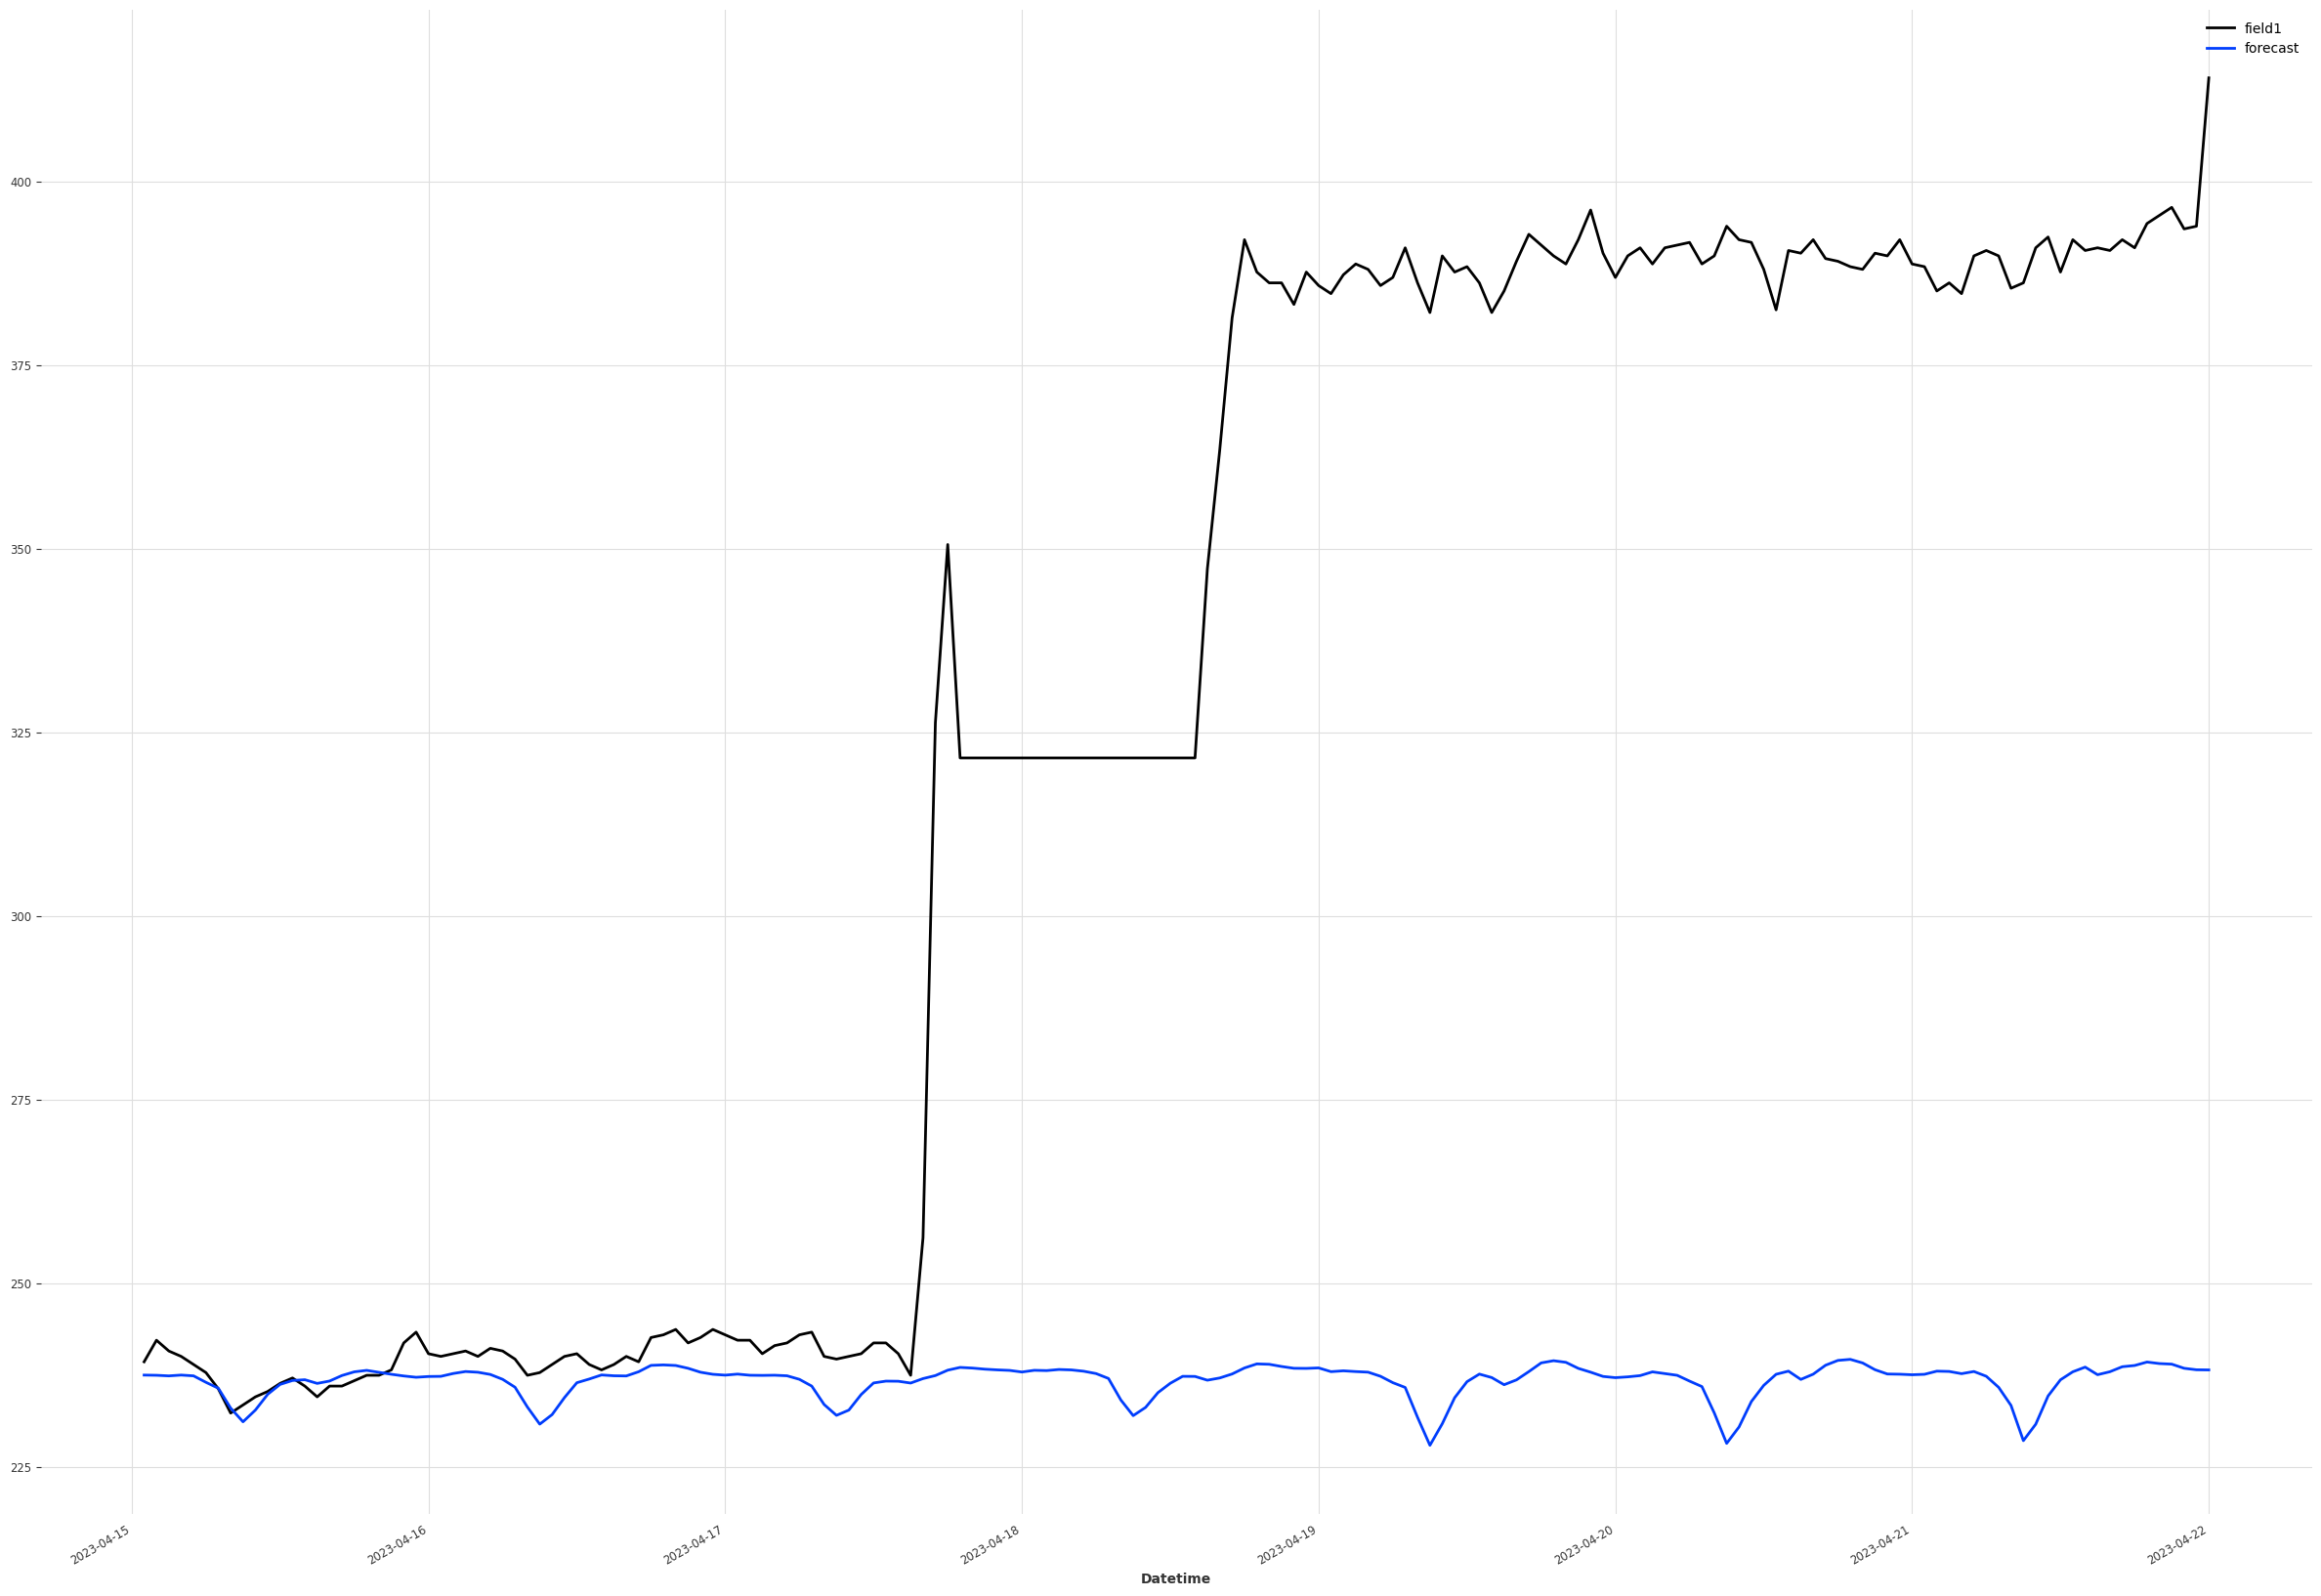

In [10]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 20]
val1.plot()
predrf1.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

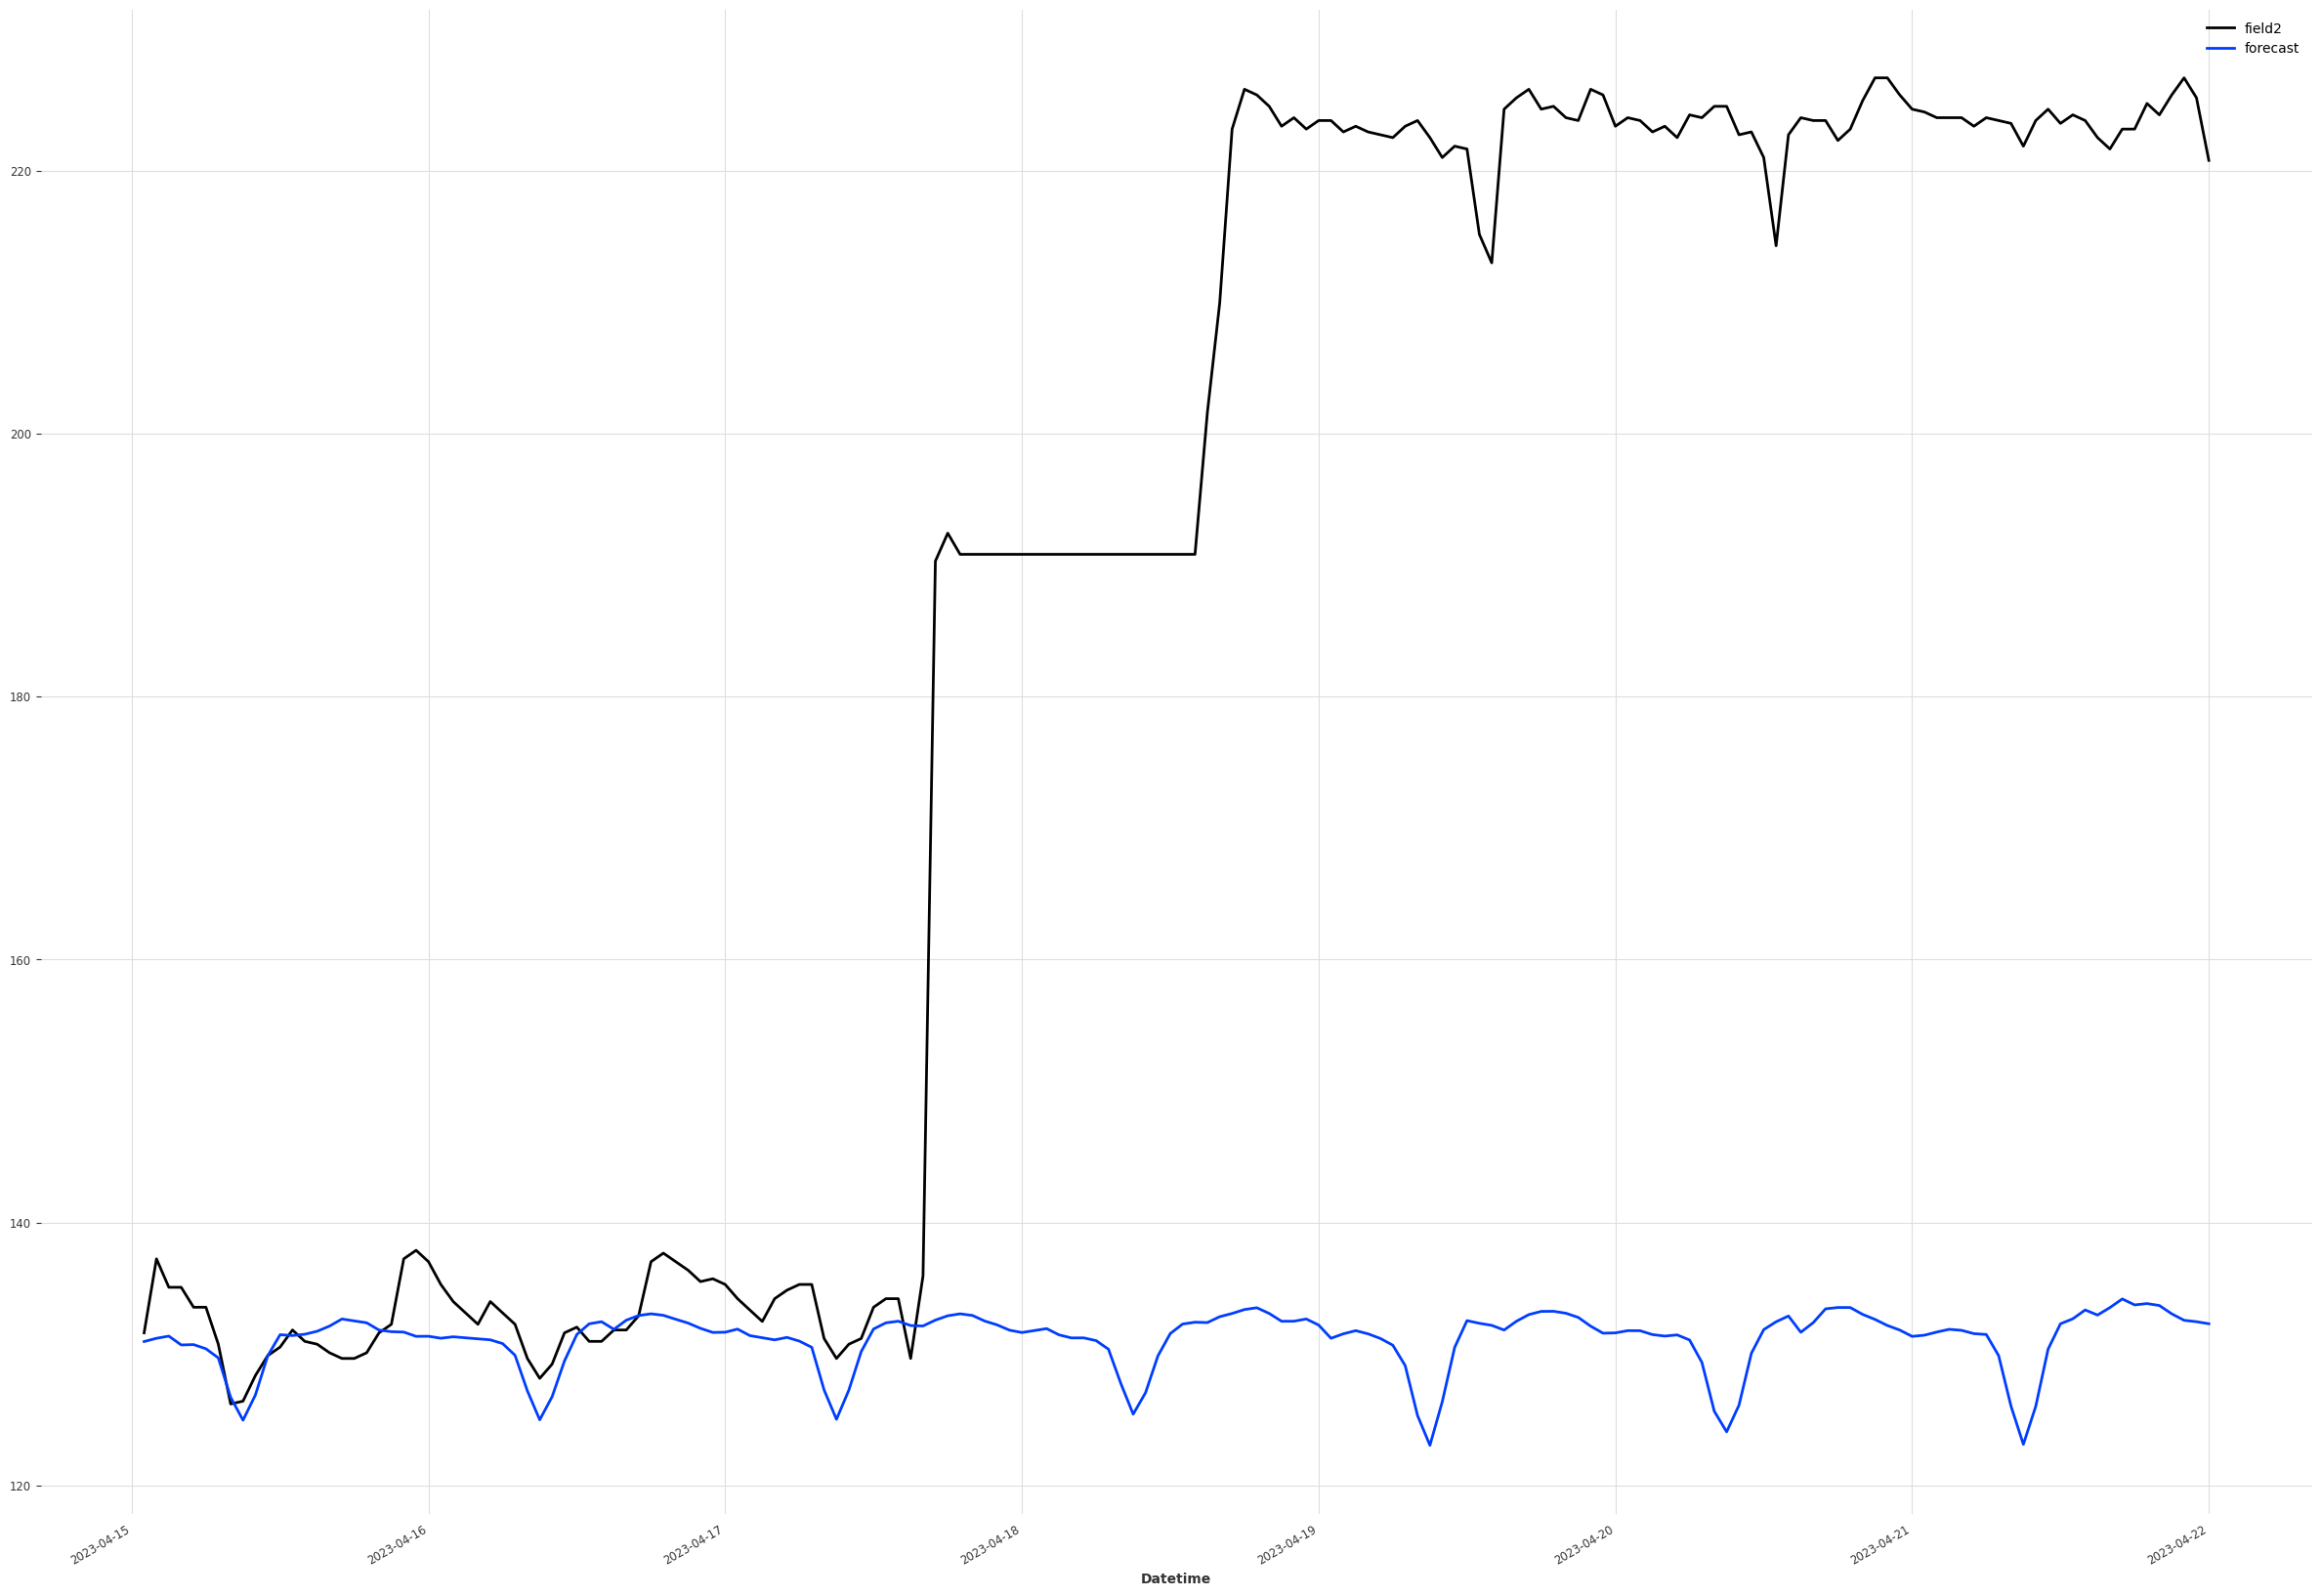

In [11]:
plt.rcParams['figure.figsize'] = [30, 20]
val2.plot()
predrf2.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

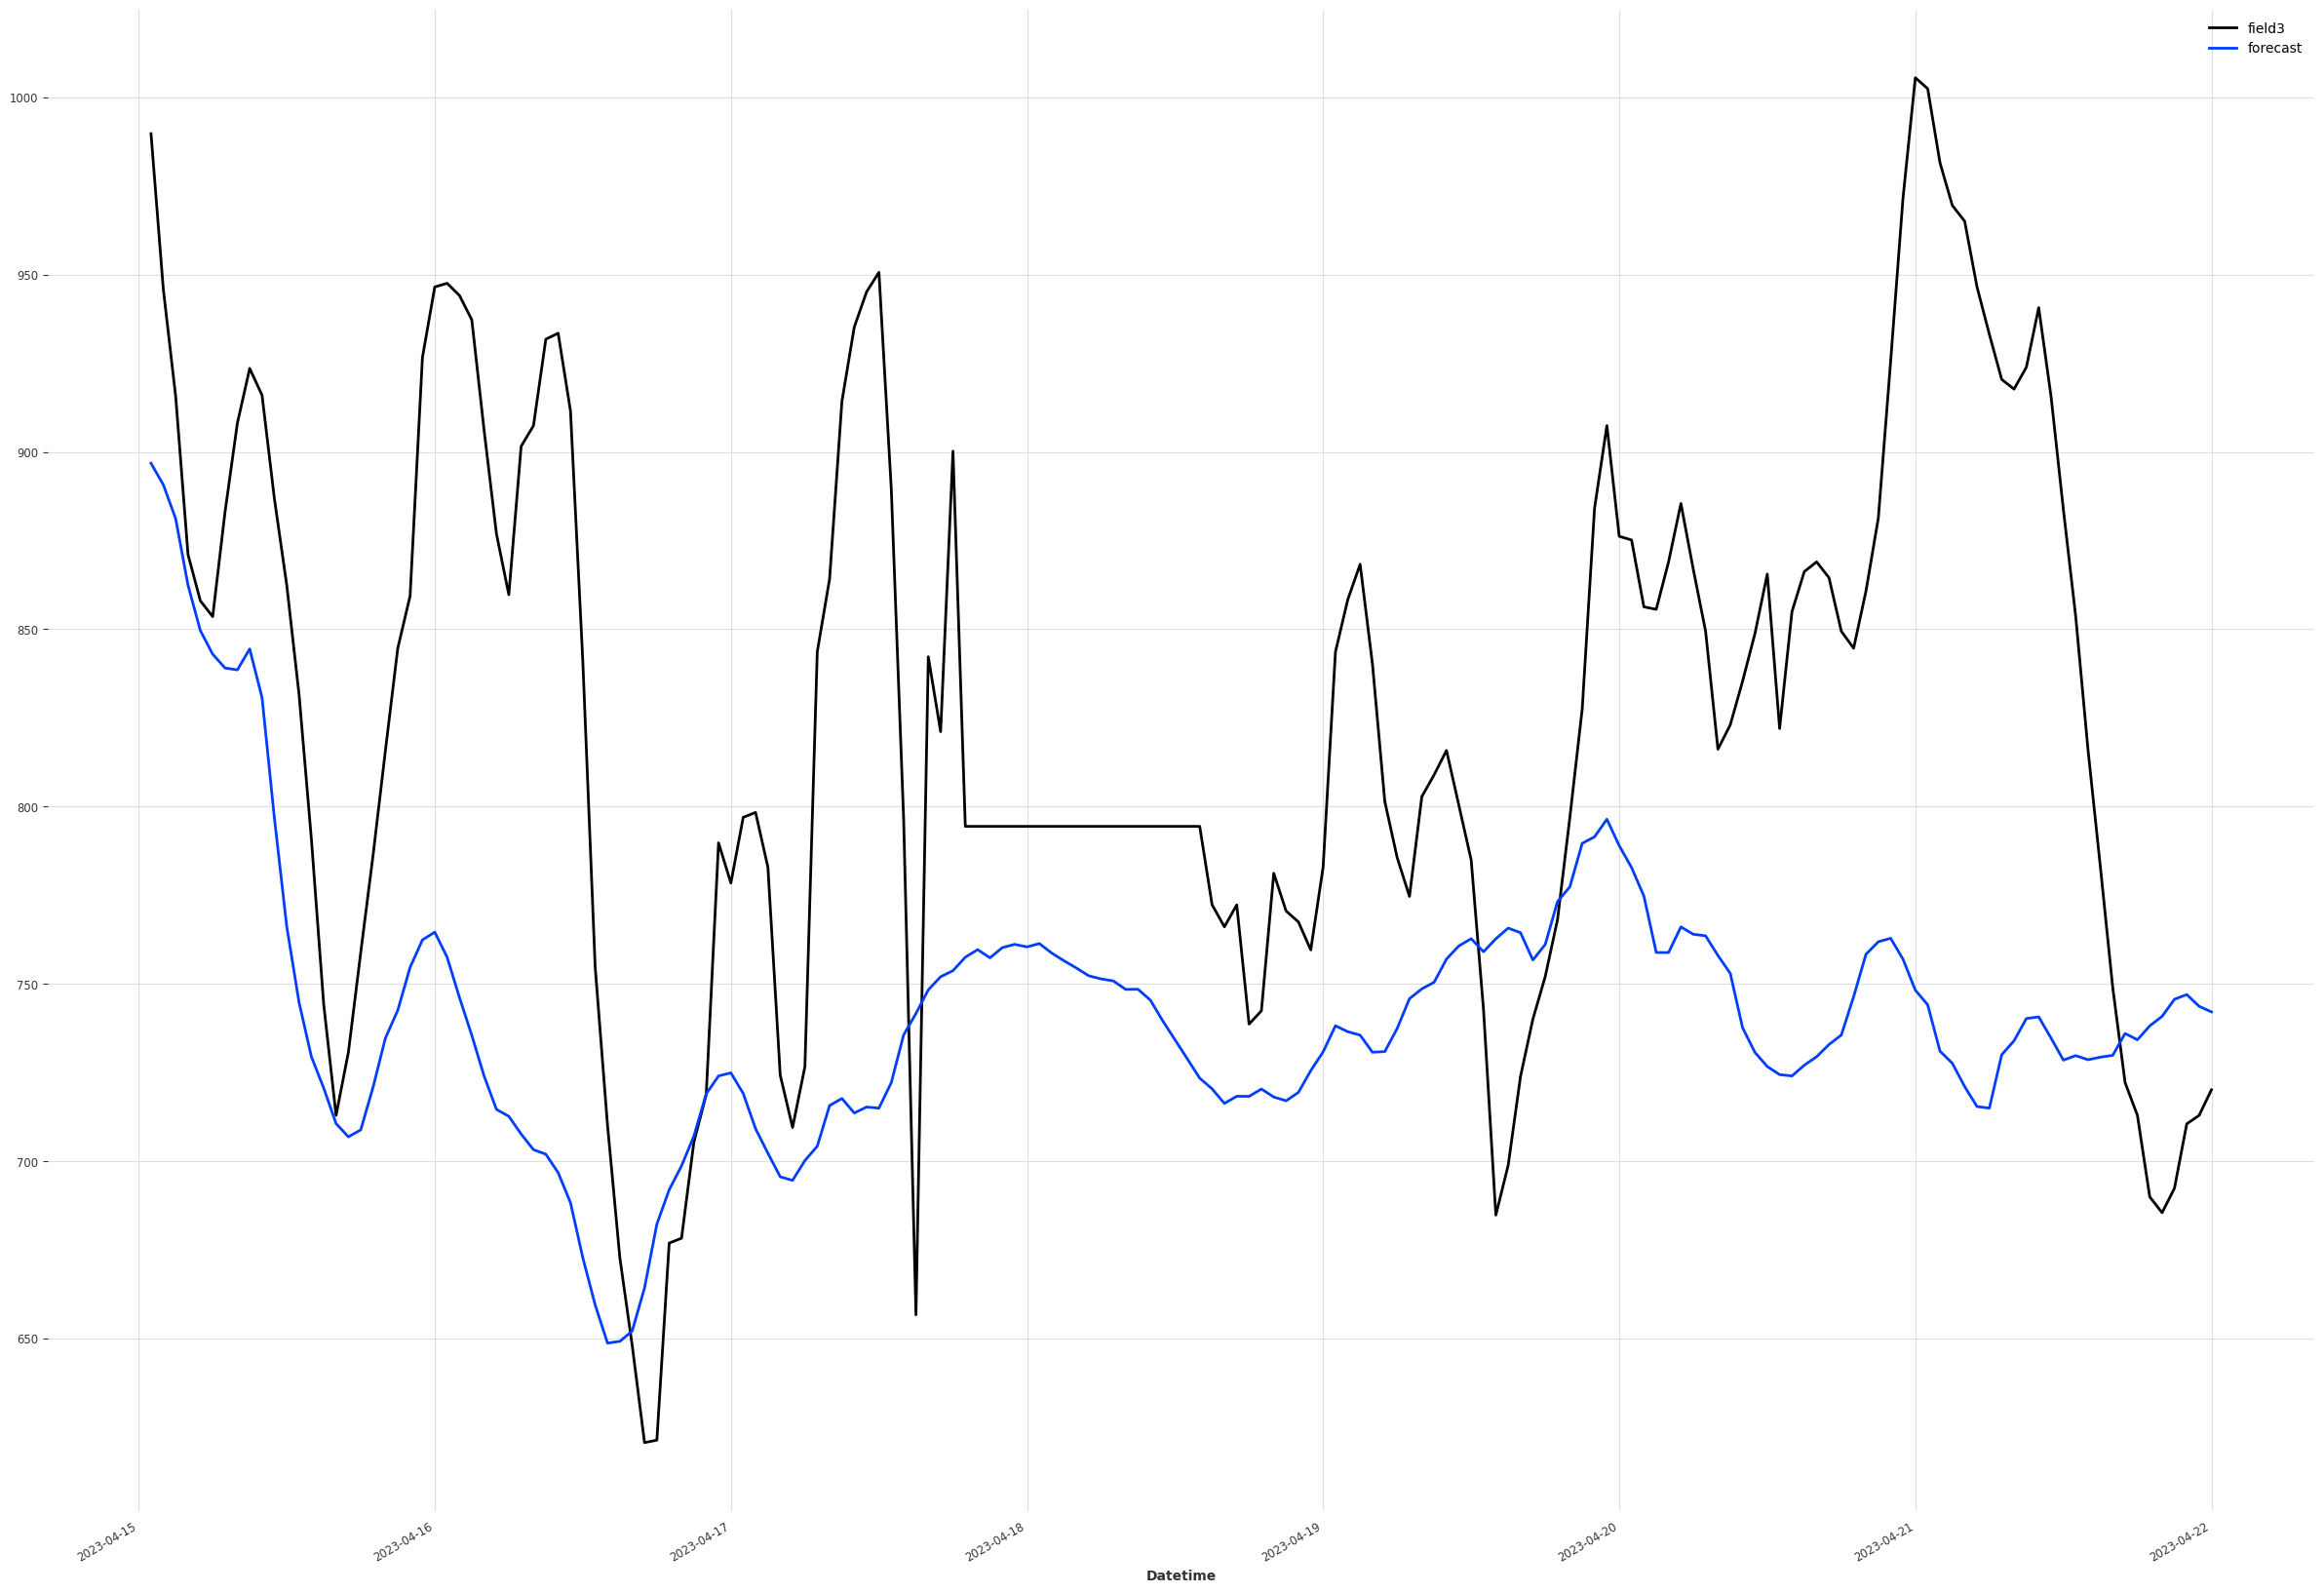

In [12]:
plt.rcParams['figure.figsize'] = [30, 20]
val3.plot()
predrf3.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

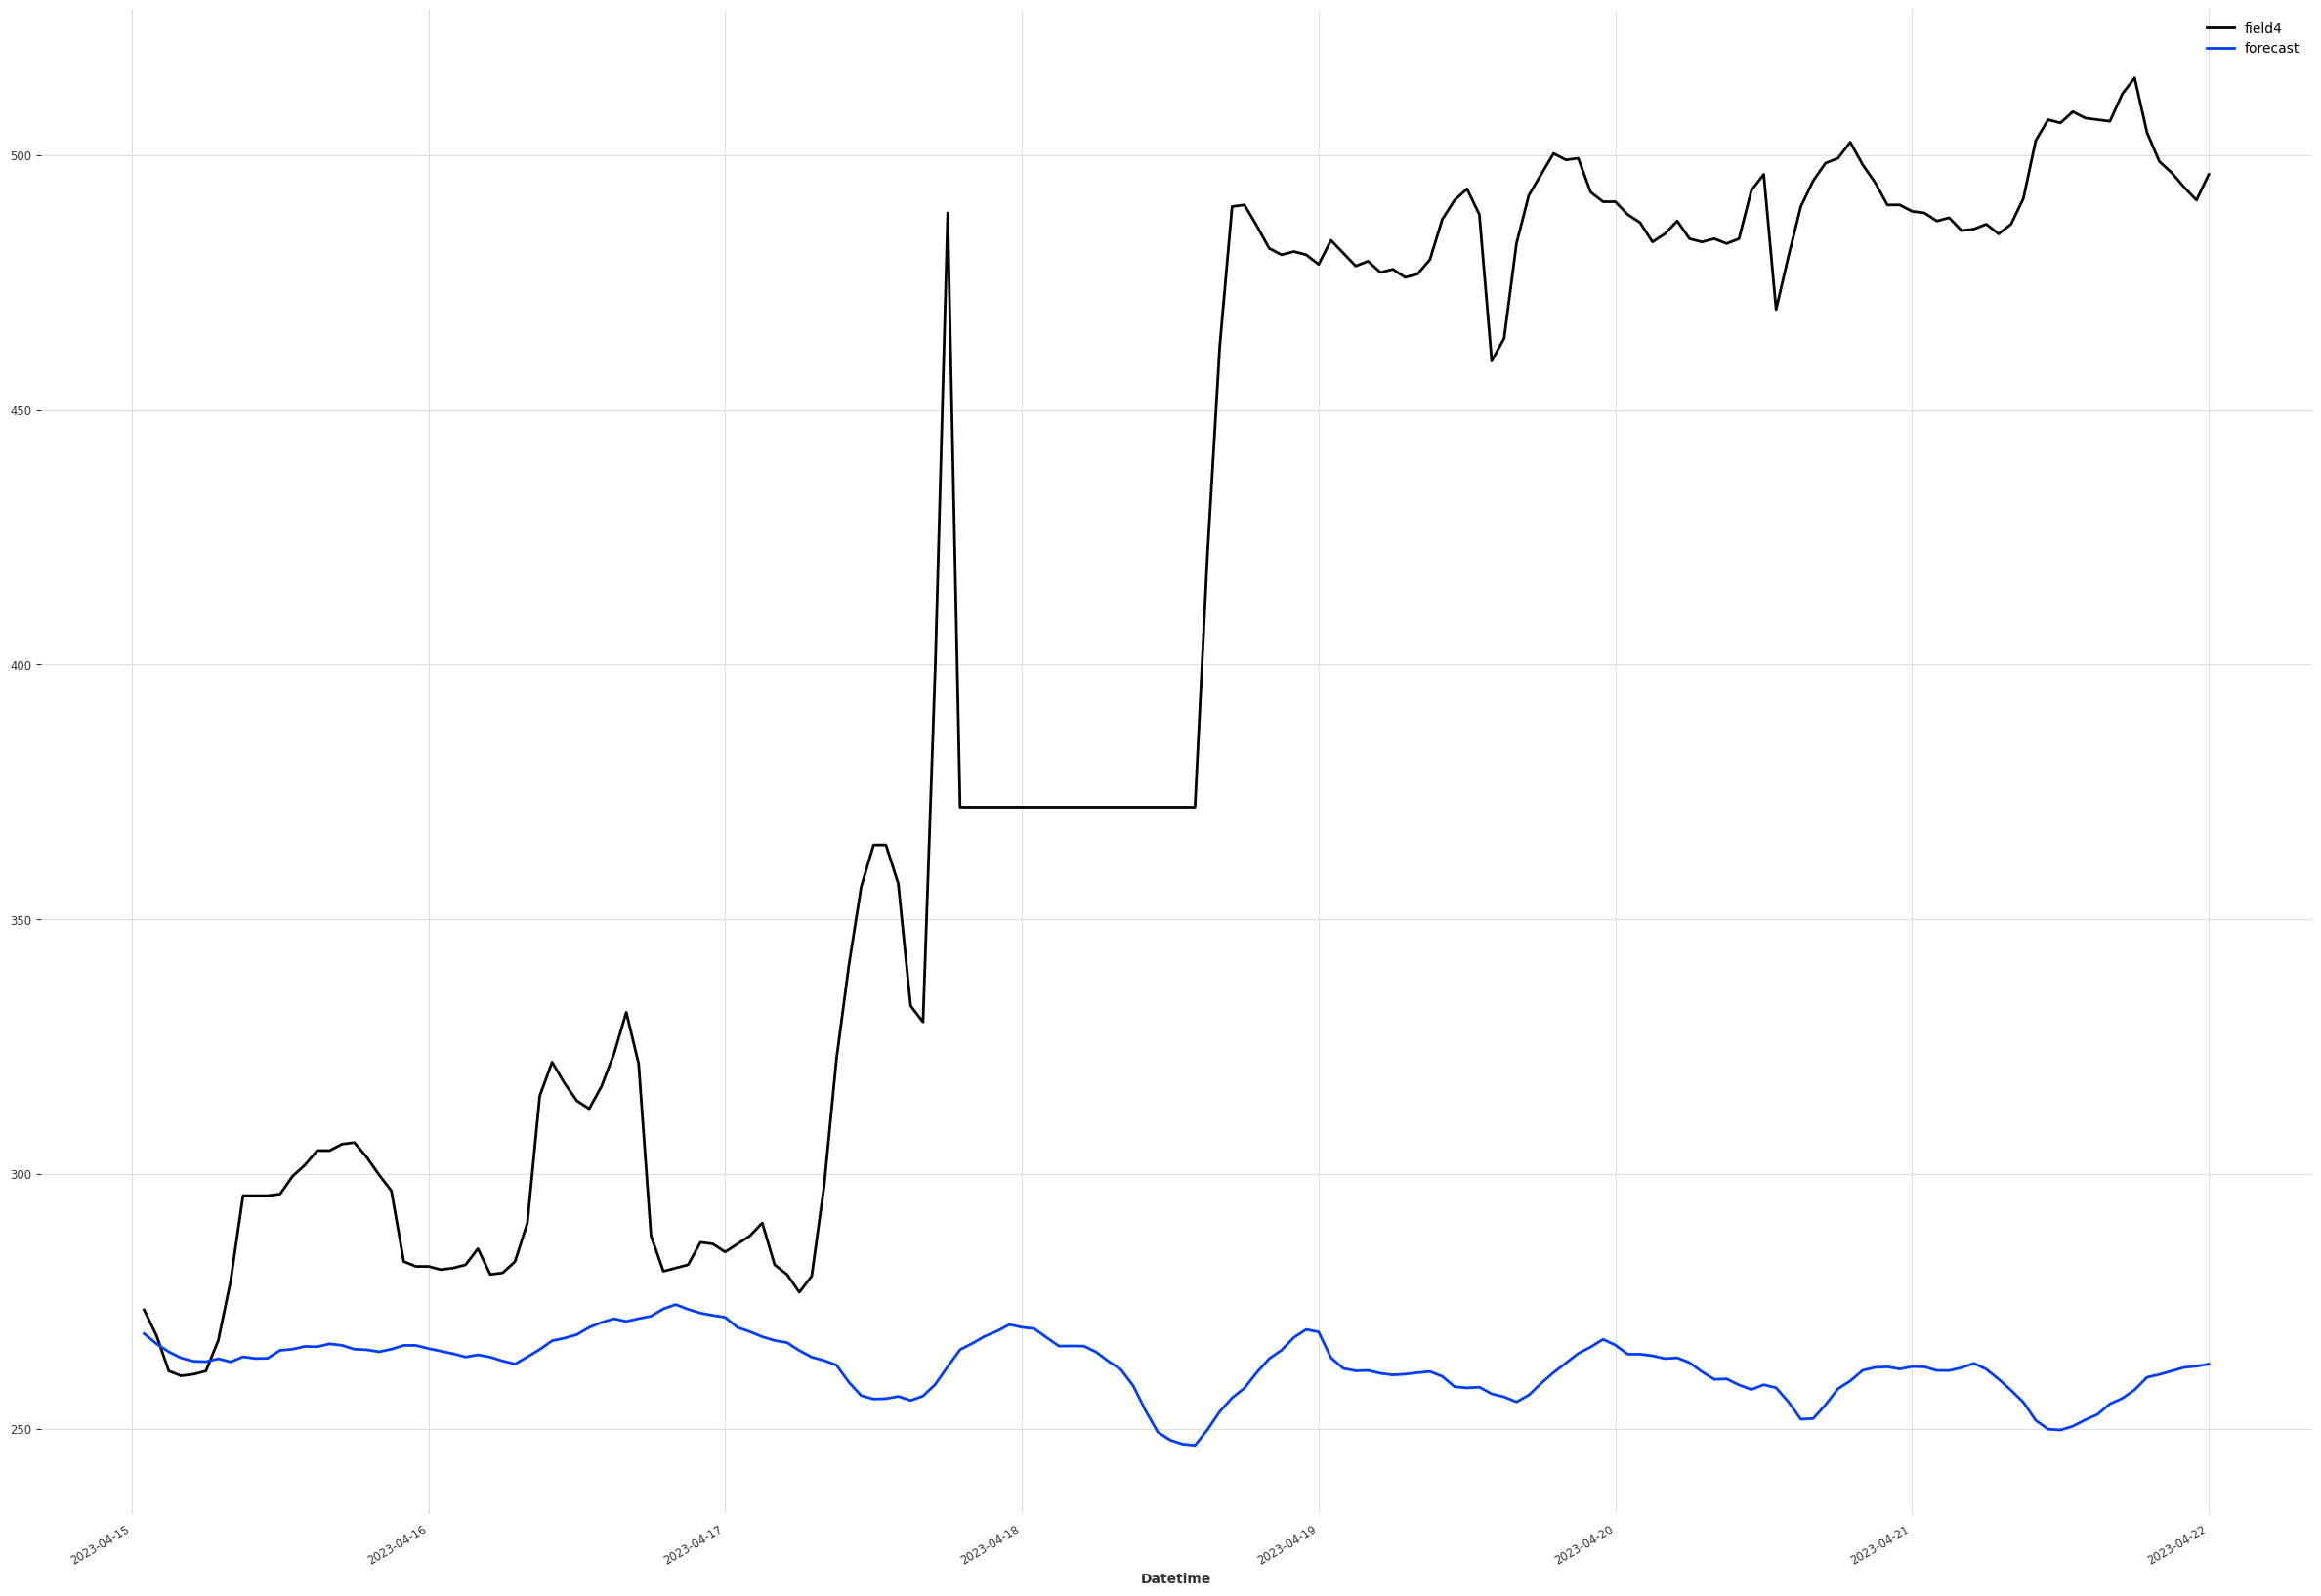

In [13]:
plt.rcParams['figure.figsize'] = [30, 20]
val4.plot()
predrf4.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

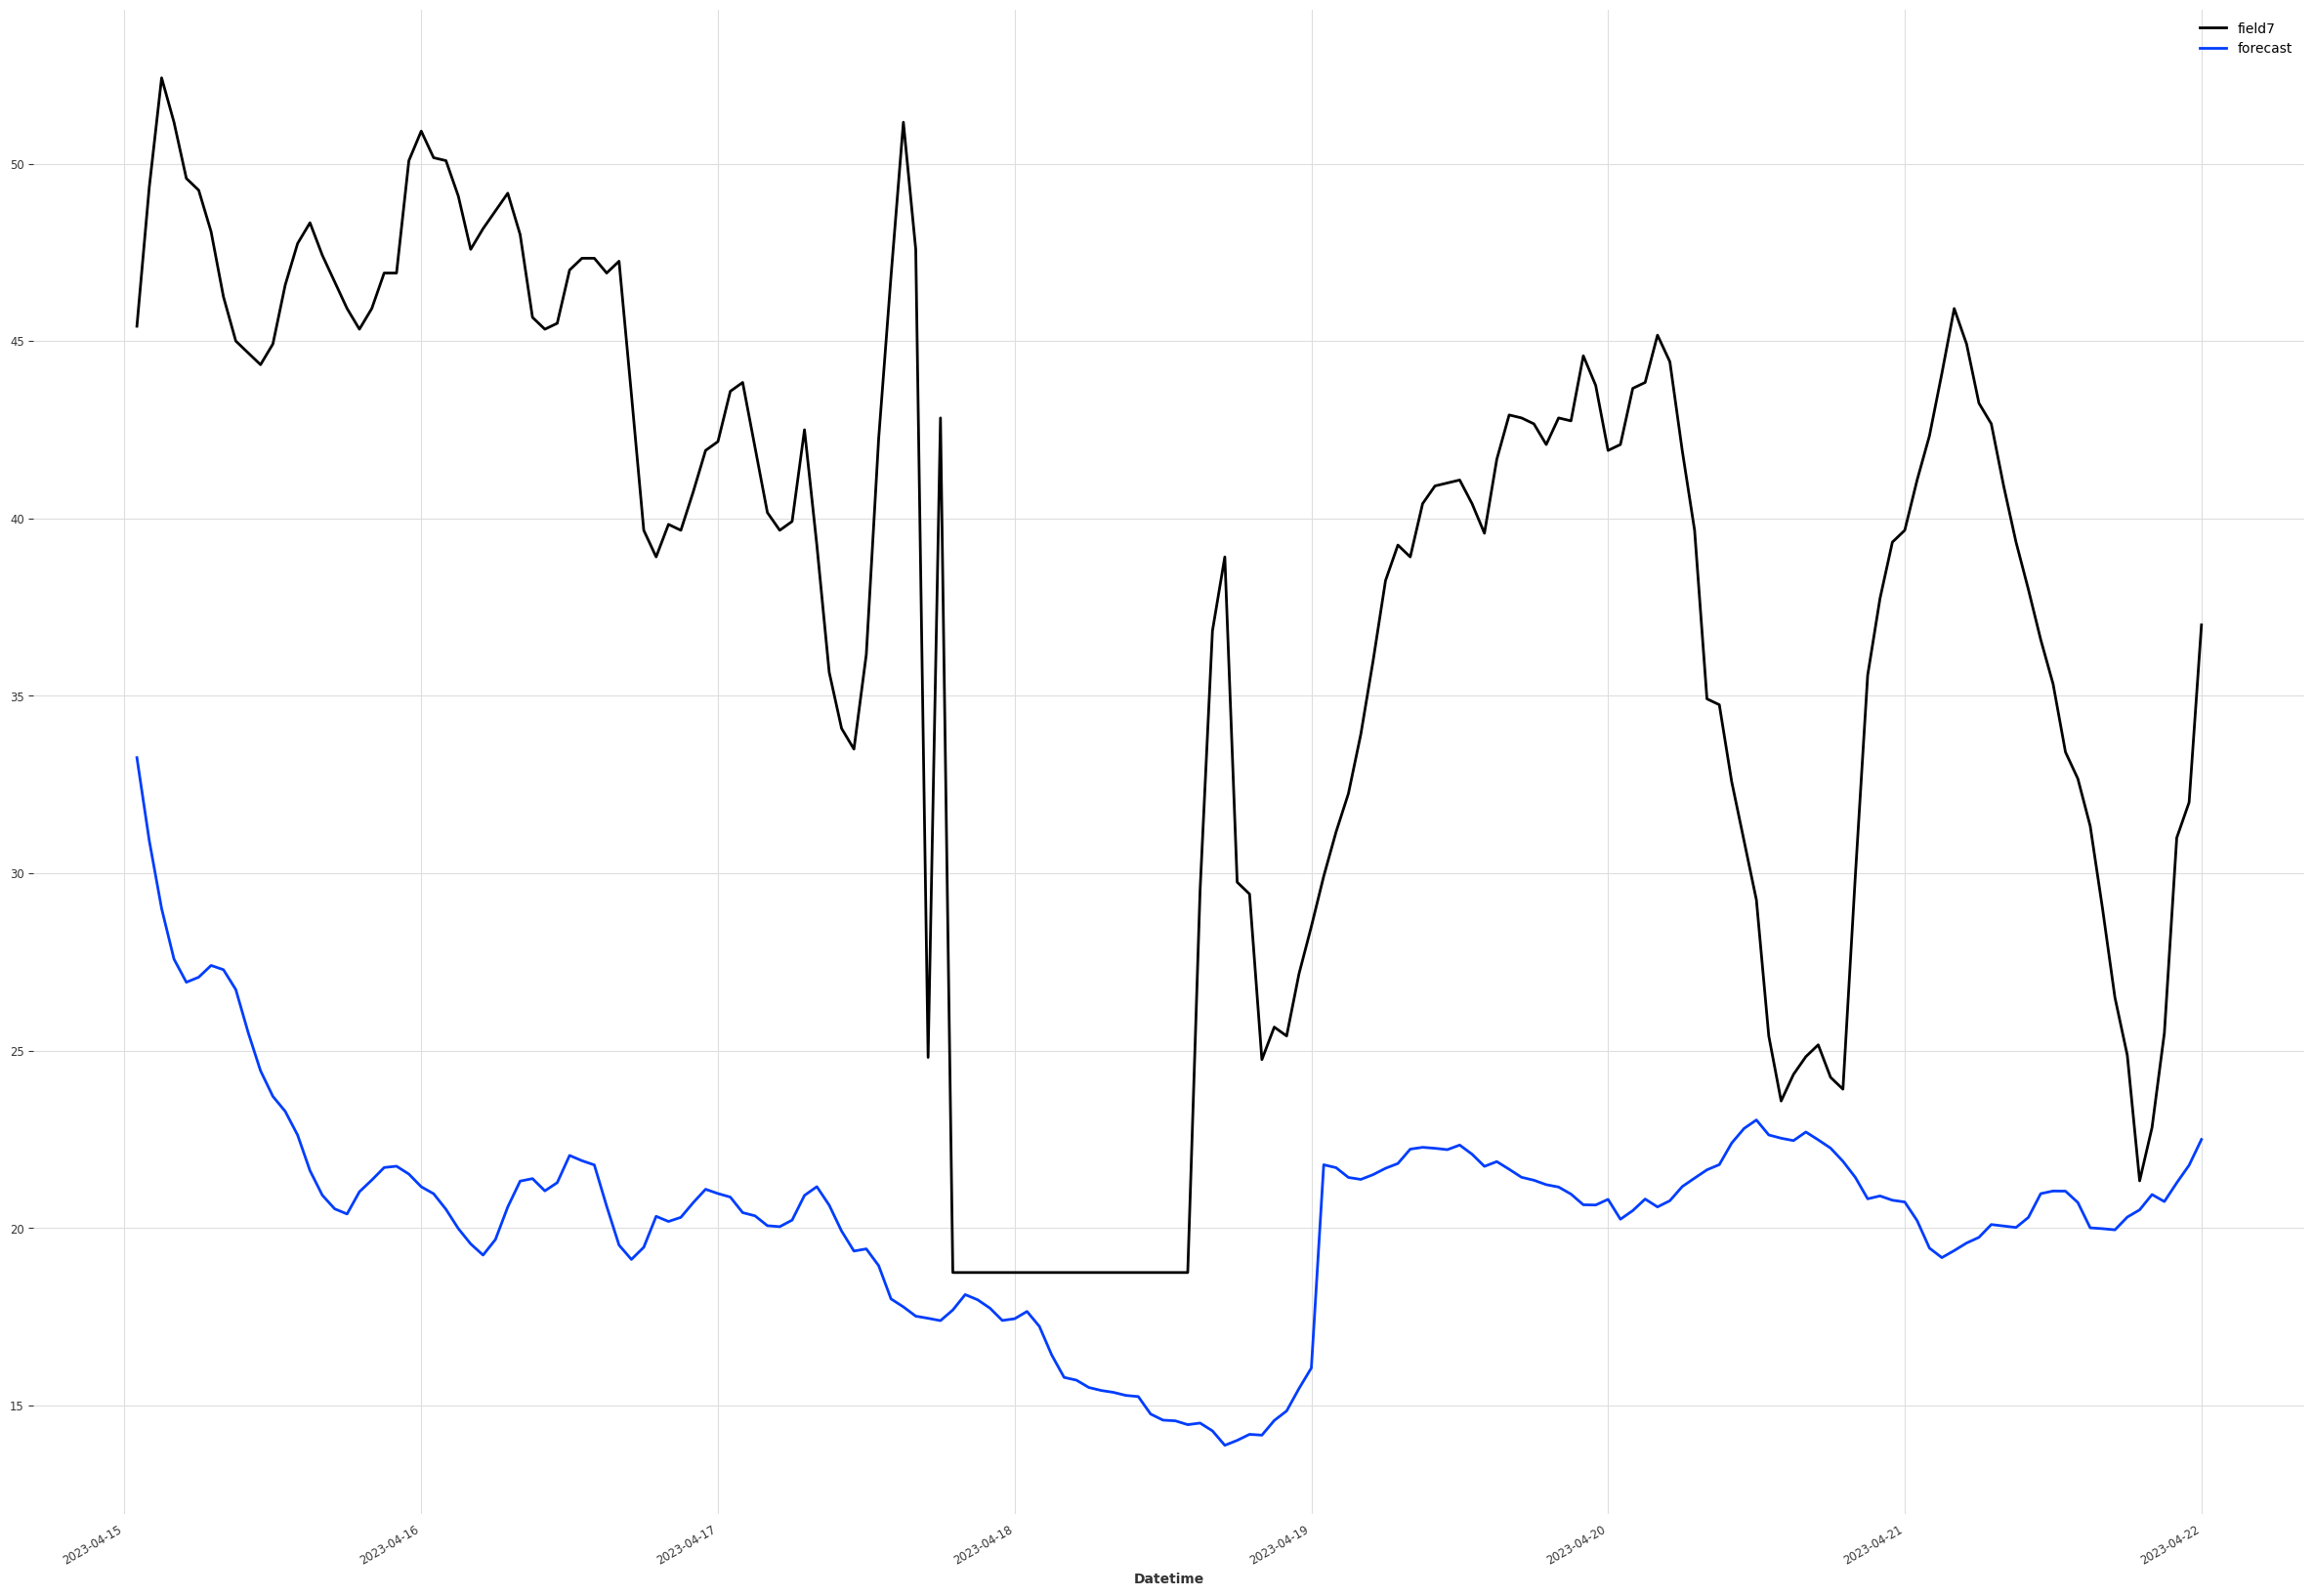

In [14]:
plt.rcParams['figure.figsize'] = [30, 20]
val7.plot()
predrf7.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

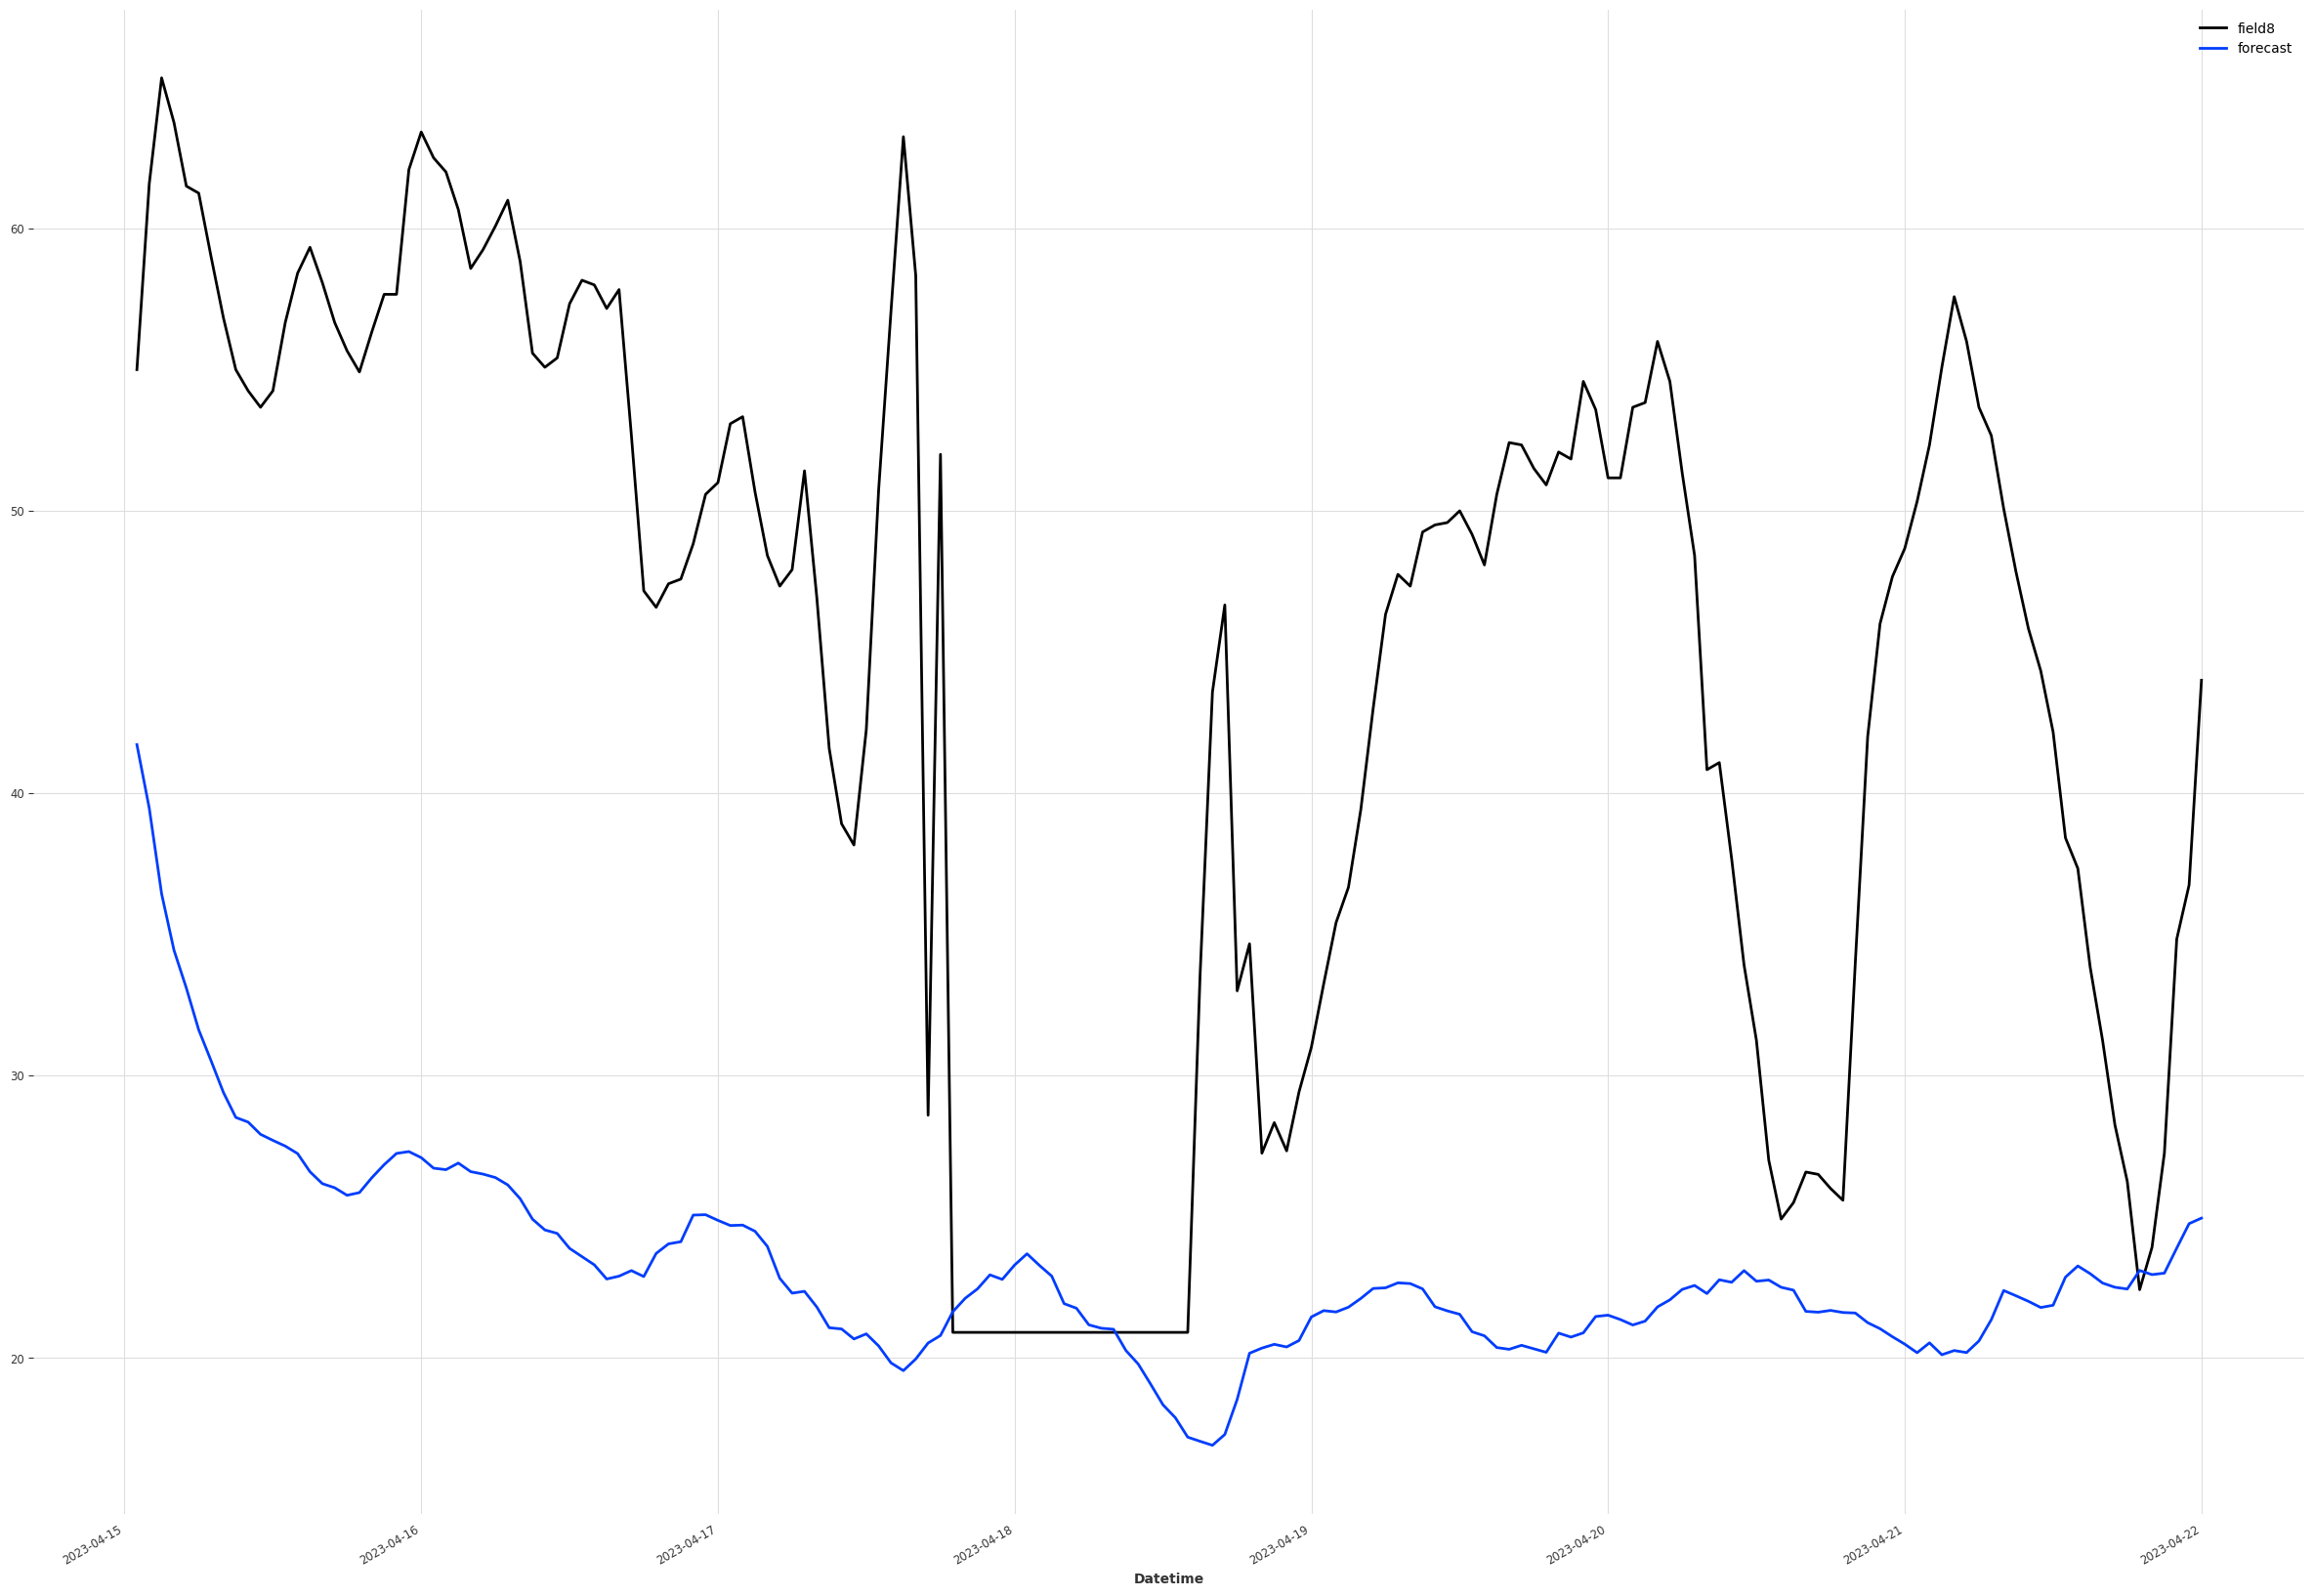

In [15]:
plt.rcParams['figure.figsize'] = [30, 20]
val8.plot()
predrf8.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()